In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from matplotlib import cm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import pandas as pd
import joblib


In [15]:
df = pd.read_csv("/Users/carolbarroco/Documents/RecomendSisKNN/TG2 RecommendSys/GitHub/T2-Indroducao-Ciencia-de-Dados/Modeling/df_with_leaf_nodes.csv")

In [22]:
df.columns
lista_colunas =  ['track_id', 'artists', 'album_name', 'track_name','popularity', 'duration_ms', 'explicit', 'danceability', 'leaf_node',
'energy','key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness','liveness', 'valence', 'tempo', 'time_signature', 'track_genre']
       
df = df[lista_colunas]
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,leaf_node,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,6g2BiiVQqY5v1S4HIrM54F,Rodrigo Amarante,Tuyo (Narcos Theme) [Extended Version] [A Netf...,Tuyo (Narcos Theme) [Extended Version] - A Net...,66,151565,False,0.765,210,0.497,1,-7.806,0.0402,0.492000,0.366000,0.1430,0.4570,112.195,4,mpb
1,6Dc2tCivms1s2X9myWe4ni,Rodrigo Amarante,Tuyo (Narcos Theme) [A Netflix Original Series...,Tuyo (Narcos Theme) - A Netflix Original Serie...,65,89293,False,0.720,210,0.422,1,-13.338,0.0690,0.474000,0.084700,0.1550,0.5460,112.219,4,mpb
2,76HOOcFt3lKVdScmoScfz1,Djavan,"Djavan ""Ao Vivo""",Azul (Ao Vivo),49,259066,False,0.632,163,0.651,7,-8.658,0.0401,0.756000,0.000004,0.7260,0.6520,119.567,4,mpb
3,4crctLJMKJekuqQ7cQLpHV,Nicolas Candido;Olívia,Apaga a Luz (feat. Olívia),Apaga a Luz (feat. Olívia),49,216446,False,0.610,158,0.420,4,-10.889,0.0462,0.815000,0.000000,0.1230,0.5530,96.313,4,mpb
4,0XXwP0EmpOEqWxcL9aSreJ,Fábio Jr.,Fabio Jr.,Pareço um Menino,50,273906,False,0.580,158,0.330,7,-13.703,0.0295,0.596000,0.000001,0.0849,0.3730,136.408,4,mpb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,78adEMnfn1XolaOh2QAjZS,Brujeria,Brujerizmo,Laboratorio Cristalitos,20,91866,False,0.474,125,0.993,1,-5.850,0.1270,0.000432,0.030100,0.3380,0.1550,128.239,4,death-metal
2996,53c9YHuifgAWJoqgPOgPUn,Unleashed,Gods of Death Metal,Long Before Winter's Call,0,227616,False,0.370,21,0.993,7,-4.465,0.1310,0.000078,0.006220,0.1270,0.0398,103.052,4,death-metal
2997,6us7QqYJGMGZqej8dKCFGC,Bury Your Dead,Cover Your Tracks,Mission: Impossible,21,162973,True,0.307,125,0.976,2,-3.552,0.2790,0.000033,0.010600,0.3110,0.4880,83.527,4,death-metal
2998,5l5XKQmo9M0XHdNAPddq0i,Surra,Bica na Cara,Vida de Babaca,22,135893,True,0.362,209,0.994,6,-1.722,0.1260,0.038000,0.000268,0.3600,0.4540,103.668,4,death-metal


In [25]:

# === 1. Prepare Data ===
X = df.iloc[:, 4:19]                # Select your feature columns
y = df["track_genre"]               # Target column

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.25, random_state=42
)




In [26]:
# === 2. Train KNN Classifier ===
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# # Save the trained model
joblib.dump(knn, "knn_model.pkl")

# === 3. Evaluation ===
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print(f"KNN Accuracy: {accuracy:.4f}")

# Optional: more detailed metrics
print("\nClassification Report:")
print(classification_report(y_pred, y_test, target_names=label_encoder.classes_))

KNN Accuracy: 0.9653

Classification Report:
              precision    recall  f1-score   support

 death-metal       0.97      0.99      0.98       234
         mpb       0.96      0.97      0.97       260
        rock       0.97      0.94      0.95       256

    accuracy                           0.97       750
   macro avg       0.97      0.97      0.97       750
weighted avg       0.97      0.97      0.97       750



In [27]:
# === 2. Train KNN Classifier ===
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# # Save the trained model
joblib.dump(knn, "knn_model.pkl")

# === 3. Evaluation ===
X_scaled = scaler.transform(X)
y_pred = knn.predict(X_scaled)
accuracy = accuracy_score(y_pred, y_encoded)
print(f"KNN Accuracy: {accuracy:.4f}")

# Optional: more detailed metrics
print("\nClassification Report:")
print(classification_report(y_pred, y_encoded, target_names=label_encoder.classes_))

KNN Accuracy: 0.9627

Classification Report:
              precision    recall  f1-score   support

 death-metal       0.98      0.97      0.97      1003
         mpb       0.95      0.96      0.96       993
        rock       0.96      0.95      0.96      1004

    accuracy                           0.96      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.96      0.96      0.96      3000



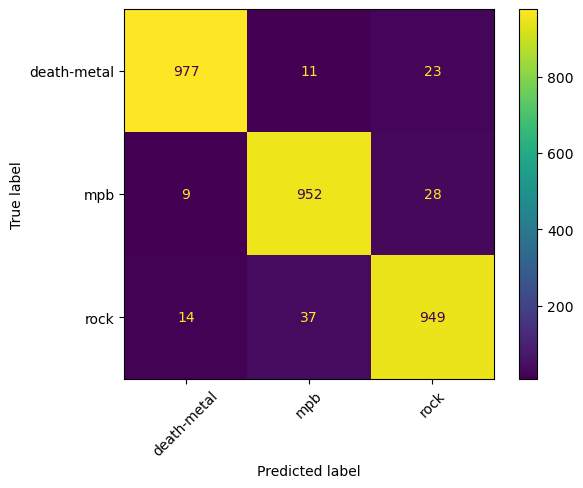

In [9]:

y_pred_decoded = label_encoder.inverse_transform(y_pred)

cm = confusion_matrix(y_pred_decoded, y, labels=label_encoder.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(xticks_rotation=45)



In [11]:
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# === 1. Load and Prepare Data ===
# Suppose df is your DataFrame with features only (no target column)
X = df.iloc[:, 6:20]  # adjust to your 14 features

# Normalize features (important for distance-based models)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# === 2. Fit NearestNeighbors Model ===
knn_ = NearestNeighbors(n_neighbors=5, metric='euclidean')
knn.fit(X_scaled,y)

# === 3. Find 5 Nearest Neighbors for a Specific Row ===
# For example, get neighbors of the first row:
distances, indices = knn.kneighbors([X_scaled[0]])

print("Indices of 5 nearest neighbors:", indices[0])
print("Distances to those neighbors:", distances[0])

# Optional: get the actual DataFrame rows of the neighbors
neighbors_df = df.iloc[indices[0]]
len(neighbors_df)


Indices of 5 nearest neighbors: [  0 903   1]
Distances to those neighbors: [0.         0.35283024 0.42955781]


3